# Telco Customer Churn Prediction - Data Preprocessing
In this notebook, we will perform data cleaning and preprocessing on the Telco Customer Churn dataset.  
Our goal is to prepare the dataset for building a classification model to predict customer churn.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [13]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


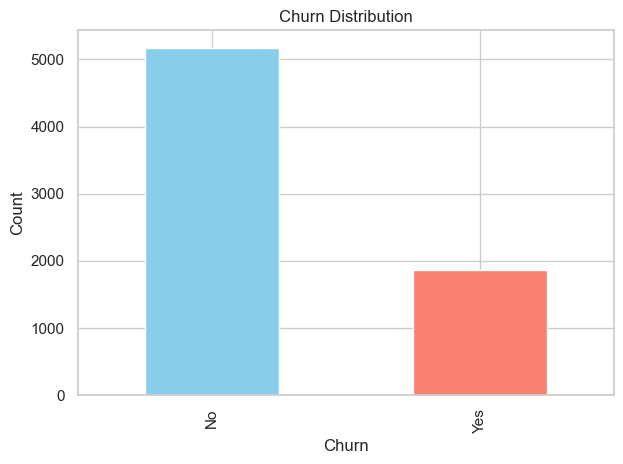

In [17]:
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../images/churn_distribution.png")
plt.show()

## Cleaning the 'TotalCharges' Column

In [20]:
print("Data type of 'TotalCharges': ", df['TotalCharges'].dtype)

non_numeric = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]
print(f"\nRows with non-numeric TotalCharges: {len(non_numeric)}")
non_numeric[['customerID', 'tenure', 'TotalCharges']]

Data type of 'TotalCharges':  object

Rows with non-numeric TotalCharges: 11


,customerID,tenure,TotalCharges
488,4472-LVYGI,0,
753,3115-CZMZD,0,
936,5709-LVOEQ,0,
1082,4367-NUYAO,0,
1340,1371-DWPAZ,0,
3331,7644-OMVMY,0,
3826,3213-VVOLG,0,
4380,2520-SGTTA,0,
5218,2923-ARZLG,0,
6670,4075-WKNIU,0,


## Converting 'TotalCharges' to Numeric and Handling Missing Values

In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Missing values in 'TotalCharges':", df['TotalCharges'].isnull().sum())

Missing values in 'TotalCharges': 11


In [25]:
df = df.dropna(subset=['TotalCharges'])

df.reset_index(drop=True, inplace=True)

## Identifying Categorical and Numerical Features

In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target column from categorical
categorical_cols.remove('Churn')

print("Categorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)

Categorical columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Numerical columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


## Encoding Categorical Variables with OneHotEncoder


In [35]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
df_encoded.head()

Shape after encoding: (7032, 7062)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,No,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,No,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,Yes,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [37]:
df_encoded.dtypes.value_counts()


bool       7057
int64         2
float64       2
object        1
Name: count, dtype: int64

## Encoding the Target Variable 'Churn'


In [40]:
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

df_encoded['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

## Normalizing Numerical Features


In [43]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()

df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

df_encoded[numerical_features].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


## Splitting the Dataset into Training and Test Sets


In [50]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(['Churn'], axis=1)
y = df_encoded['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (5625, 7061)
Test set shape: (1407, 7061)


In [52]:
df_encoded.to_csv("../data/preprocessed_telco.csv", index=False)